The project will analyse the different themes and colours of Lego sets over time with Python.

Inspired by the DataCamp Exploring the History of Lego project by Ramnath Vaidyanathan.


First I will import the data colors and look at the first few rows. 

In [19]:
# Import modules
import pandas as pd

# Read colors data
colours = pd.read_csv('colors.csv')

# Print the first few rows
colours.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


From the first few lines we can see the color id(id), the colour name(name) and the color code(rgb). The is_trans column of the dataset indicates whether a colour is transparent or not with f representing false and t representing true.  

We can see from the data below that there is 135 colours available for lego blocks. 

In [20]:
n_colours = colours.rgb.size
print(n_colours)

135


Below we can see the distribution of transparent vs. non-transparent colours in a plot


In [21]:
# colors_summary: Distribution of colours based on transparency
colours_summary = colours.groupby('is_trans', as_index = True).count()
print(colours_summary)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


This shows that there is considerably more bricks that are not transparent than are with only around 26% 
colours being transparent over time.


,year,num_parts
0,1950,10.142857
1,1953,16.500000
2,1954,12.357143
3,1955,36.857143
4,1956,18.500000


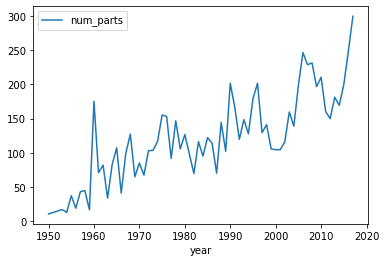

In [22]:
#We can explore the average number of parts in Lego sets over the years

# Read sets data as `sets`
sets = pd.read_csv('sets.csv')
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].\
  groupby('year', as_index = False).\
  mean()
parts_by_year.head()

# Plot trends in average number of parts by year
parts_by_year.plot(x = 'year', y = 'num_parts')
parts_by_year.head()


We can see above that as there is an upward trend of variations of the number of parts in a lego set. Particularly 
in 1960 and the mid 2010s with a steep incline of parts used.

We can explore the lego blocks different themes and how many themes are shipped per year below. 

In [24]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].\
  groupby('year', as_index = False).\
  agg({"theme_id": pd.Series.nunique})
themes_by_year.head()

,year,theme_id
0,1950,2
1,1953,1
2,1954,2
3,1955,4
4,1956,3
